In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json

In [2]:
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

In [3]:
def LookupTableC08(value: int,outclass: str) -> str:
    #value - Class value
    #outclass - Output class. Types: 'Original' (Original class) and 'GPW' (Global Pasture Watch)
    result = ''  
    value = str(value)
    outclass = outclass.lower()
    obj = {
        "3":["Forest Formation",0],
        "4":["Savanna Formation",1],
        "5":["Mangrove",0],
        "6":["Floodable Forest",0],
        "9":["Wooded Sandbank Vegetation",0],
        "11":["Wetland",0],
        "12":["Grassland",1],
        "13":["Other non Forest Formations",0],
        "15":["Pasture",2],
        "18":["Agriculture",3],
        "23":["Beach, Dune and Sand Spot",0],
        "24":["Urban Area",0],
        "25":["Other non Vegetated Areas",0],
        "27":["Not Observed",0],
        "29":["Rocky Outcrop",0],
        "30":["Mining",0],
        "31":["Aquaculture",0],
        "32":["Hypersaline Tidal Flat",0],
        "33":["River, Lake and Ocean",0],
        "50":["Herbaceous Sandbank Vegetation",1],       
     }

    if outclass == 'original':
        result = obj[value][0]
    
    elif outclass == 'gpw':
        mainClass = {
            '0':'Other land cover',
            '1':'Natural and Semi-natural grassland',
            '2':'Cultivated grassland',
            '3':'Crops and other related agricultural practices',
        }
        codClass = str(obj[value][1])
        result = mainClass[codClass]
    
    return result

In [11]:
src = '02_brazil_lulc_samples_1985_2022_row_wise.parquet'
data = pd.read_parquet(src)
df = data[['LAT','LON','year','PESO_AMOS','REF_L2']]
df

,LAT,LON,year,PESO_AMOS,REF_L2
0,-44.642265,-1.861038,1985,166203.669951,5
1,-44.799650,-1.693951,1985,166311.800000,5
2,-44.856514,-1.662690,1985,166311.800000,5
3,-44.885080,-1.475660,1985,166203.669951,5
4,-44.873492,-1.635201,1985,166203.669951,5
...,...,...,...,...,...
3234365,-49.418248,-28.809149,2022,100893.545852,24
3234366,-52.838674,-26.075396,2022,106233.420561,24
3234367,-49.461368,-28.948208,2022,100822.494624,24
3234368,-46.744593,-23.301757,2022,120036.862745,24


In [12]:
df['class'] = df.REF_L2.apply(lambda x: LookupTableC08(x,'original'))
df.rename(columns = {
    "REF_L2":"class-cod"
},inplace=True)
df                              

C:\Users\bernard\AppData\Local\Temp\ipykernel_26568\3473349784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df.REF_L2.apply(lambda x: LookupTableC08(x,'original'))
C:\Users\bernard\AppData\Local\Temp\ipykernel_26568\3473349784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {


,LAT,LON,year,PESO_AMOS,class-cod,class
0,-44.642265,-1.861038,1985,166203.669951,5,Mangrove
1,-44.799650,-1.693951,1985,166311.800000,5,Mangrove
2,-44.856514,-1.662690,1985,166311.800000,5,Mangrove
3,-44.885080,-1.475660,1985,166203.669951,5,Mangrove
4,-44.873492,-1.635201,1985,166203.669951,5,Mangrove
...,...,...,...,...,...,...
3234365,-49.418248,-28.809149,2022,100893.545852,24,Urban Area
3234366,-52.838674,-26.075396,2022,106233.420561,24,Urban Area
3234367,-49.461368,-28.948208,2022,100822.494624,24,Urban Area
3234368,-46.744593,-23.301757,2022,120036.862745,24,Urban Area


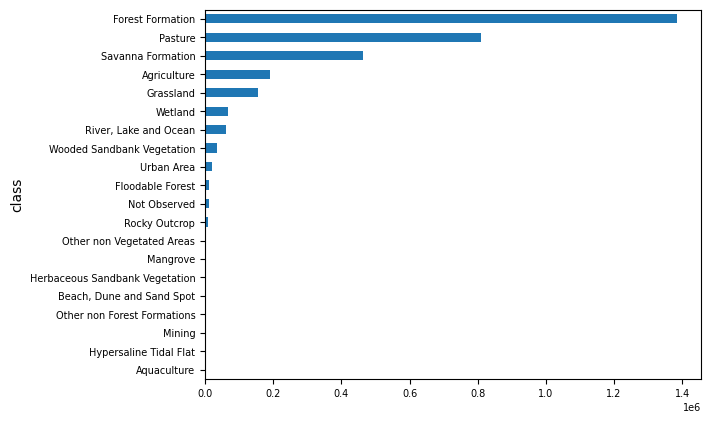

In [13]:
_ = df['class'].value_counts().sort_values().plot(kind='barh')

### Transformation data

In [14]:
#Copy original dataframe lulc
dataMB = df.copy()

#Rename columns from original data
dataMB.rename(columns = {
    'year':'reference_year',
    'class':'original_lulc_class',
    'PESO_AMOS':'sample_weight'
},inplace=True)

dataMB['dataset_name'] = 'Mapbiomas'
dataMB['gpw_lulc_class'] = dataMB['class-cod'].apply(lambda x: LookupTableC08(x,'gpw'))
dataMB = dataMB[['LAT','LON','dataset_name','reference_year','original_lulc_class','gpw_lulc_class','sample_weight']]
dataMB

,LAT,LON,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight
0,-44.642265,-1.861038,Mapbiomas,1985,Mangrove,Other land cover,166203.669951
1,-44.799650,-1.693951,Mapbiomas,1985,Mangrove,Other land cover,166311.800000
2,-44.856514,-1.662690,Mapbiomas,1985,Mangrove,Other land cover,166311.800000
3,-44.885080,-1.475660,Mapbiomas,1985,Mangrove,Other land cover,166203.669951
4,-44.873492,-1.635201,Mapbiomas,1985,Mangrove,Other land cover,166203.669951
...,...,...,...,...,...,...,...
3234365,-49.418248,-28.809149,Mapbiomas,2022,Urban Area,Other land cover,100893.545852
3234366,-52.838674,-26.075396,Mapbiomas,2022,Urban Area,Other land cover,106233.420561
3234367,-49.461368,-28.948208,Mapbiomas,2022,Urban Area,Other land cover,100822.494624
3234368,-46.744593,-23.301757,Mapbiomas,2022,Urban Area,Other land cover,120036.862745


In [15]:
dataMB.duplicated().sum()

0

In [16]:
dataMB.original_lulc_class.unique()

array(['Mangrove', 'Not Observed', 'Forest Formation', 'Grassland',
       'Pasture', 'Urban Area', 'Floodable Forest', 'Savanna Formation',
       'Agriculture', 'River, Lake and Ocean', 'Rocky Outcrop', 'Wetland',
       'Other non Vegetated Areas', 'Wooded Sandbank Vegetation',
       'Mining', 'Other non Forest Formations',
       'Herbaceous Sandbank Vegetation', 'Hypersaline Tidal Flat',
       'Beach, Dune and Sand Spot', 'Aquaculture'], dtype=object)

In [17]:
len(dataMB.original_lulc_class.unique())

20

In [18]:
print('Rows:',dataMB.shape[0])

Rows: 3234370


<Axes: >

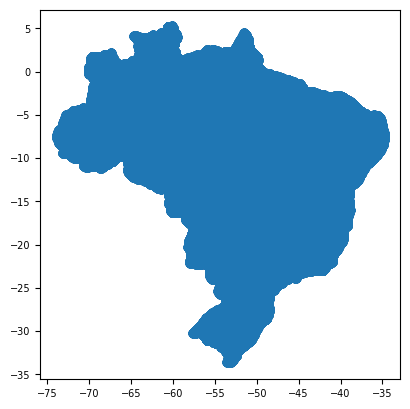

In [19]:
crs = "EPSG:4326"

dataMBGeo = gpd.GeoDataFrame(dataMB, geometry=gpd.points_from_xy(dataMB.LAT, dataMB.LON),crs=crs)
dataMBGeo.plot()

In [20]:
dataMBGeo['observation'] = ''
dataMBGeo

,LAT,LON,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,-44.642265,-1.861038,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.64227 -1.86104),
1,-44.799650,-1.693951,Mapbiomas,1985,Mangrove,Other land cover,166311.800000,POINT (-44.79965 -1.69395),
2,-44.856514,-1.662690,Mapbiomas,1985,Mangrove,Other land cover,166311.800000,POINT (-44.85651 -1.66269),
3,-44.885080,-1.475660,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.88508 -1.47566),
4,-44.873492,-1.635201,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.87349 -1.63520),
...,...,...,...,...,...,...,...,...,...
3234365,-49.418248,-28.809149,Mapbiomas,2022,Urban Area,Other land cover,100893.545852,POINT (-49.41825 -28.80915),
3234366,-52.838674,-26.075396,Mapbiomas,2022,Urban Area,Other land cover,106233.420561,POINT (-52.83867 -26.07540),
3234367,-49.461368,-28.948208,Mapbiomas,2022,Urban Area,Other land cover,100822.494624,POINT (-49.46137 -28.94821),
3234368,-46.744593,-23.301757,Mapbiomas,2022,Urban Area,Other land cover,120036.862745,POINT (-46.74459 -23.30176),


In [21]:
dataMBGeo.iloc[:,2:].head(5)

,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.64227 -1.86104),
1,Mapbiomas,1985,Mangrove,Other land cover,166311.800000,POINT (-44.79965 -1.69395),
2,Mapbiomas,1985,Mangrove,Other land cover,166311.800000,POINT (-44.85651 -1.66269),
3,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.88508 -1.47566),
4,Mapbiomas,1985,Mangrove,Other land cover,166203.669951,POINT (-44.87349 -1.63520),


In [38]:
srcout = '02_db_mapbiomes.parquet'
dataMBGeo.iloc[:,2:].to_parquet(srcout)